<a href="https://colab.research.google.com/github/manoj-mathivanan/pythonML/blob/main/Manoj_Assignment17_Linear_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def LinearModelPrediction(x,w):
  yh = w[0] + w[1]*x
  return yh

def LogisticModelPrediction(x,w):
  yh = 1/(1+np.exp(-(w[0]+w[1]*x)))
  return yh

In [9]:
def LinearModelErrorCost(yh,y):
  m=len(y)
  error=yh-y
  return np.mean(error**2)/(2)

def LogisticModelErrorCost(yh,y):
  m=len(y)
  error=y*np.log(yh)+(1-y)*np.log(1-yh)
  return (-1/m)*np.sum(error)

In [10]:
def gradient_descent(x,y,yh,w):
  m=len(y)
  error = yh -y
  w0_grad=(1/m)*np.sum(error)
  w1_grad=(1/m)*np.sum(error*x)
  return np.array([w0_grad,w1_grad])

In [11]:
def Batch_Method(initial_guess, learning_rate, num_iterations, predictionmodel, predictionmodelcost, x, y):
  w = np.array(initial_guess)
  losses = []
  for i in range(num_iterations):
    yh = predictionmodel(x,w)
    loss = predictionmodelcost(yh,y)
    losses.append(loss)
    grad = gradient_descent(x,y,yh,w)
    w = w - learning_rate * grad
  return w,losses

In [20]:
def Mini_Batch_Method(batch_size, initial_guess, learning_rate, num_iterations, predictionmodel, predictionmodelcost, x, y):
  w = np.array(initial_guess)
  losses = []
  subarrays = np.array_split(x, batch_size)
  for i in range(num_iterations):
    for subarray in enumerate(subarrays):
      yh = predictionmodel(x,w)
      loss = predictionmodelcost(yh,y)
      losses.append(loss)
      grad = gradient_descent(x,y,yh,w)
      w = w - learning_rate * grad
  return w,losses

In [13]:
def plot(input, output, predictionmodel, final_position, header):
  print("Final position for ", header, " is ", final_position)
  #Plot the output
  plt.scatter(input, output, color='green', label='Input',marker='o')
  plt.plot(input, predictionmodel(input, final_position), color='red', label='Predicted')
  plt.title('Value and Prediction')
  plt.xlabel('Input')
  plt.ylabel('Output')
  plt.grid(True)
  plt.show()

  plt.plot(losses, color='blue', label='Loss',marker='o')
  plt.title('Loss Function')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.show()

Final position for :  Linear Batch  is  [2.12238143 1.95150113]


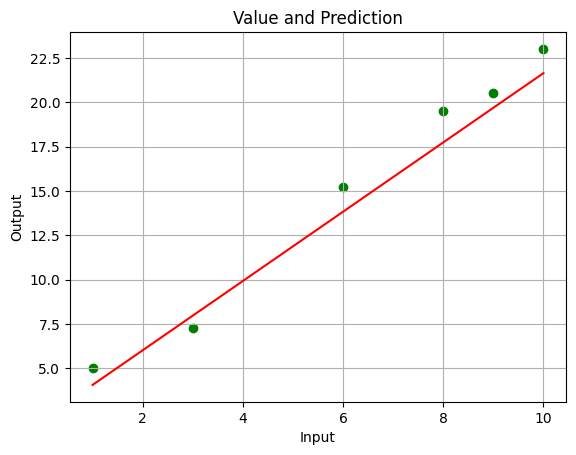

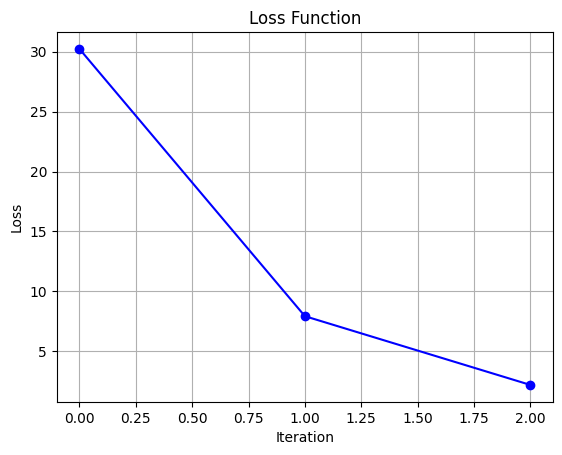

Final position for :  Linear Mini Batch  is  [2.14198974 2.09158045]


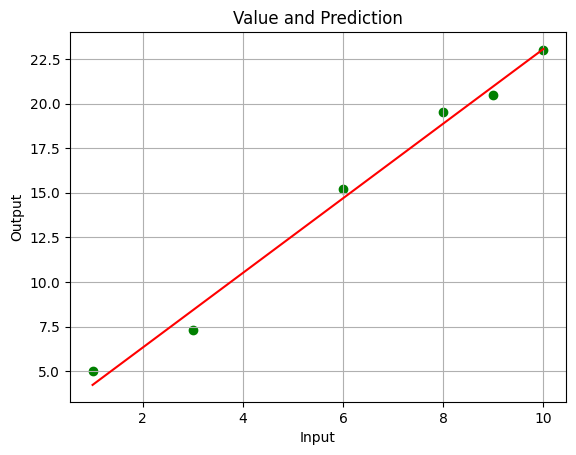

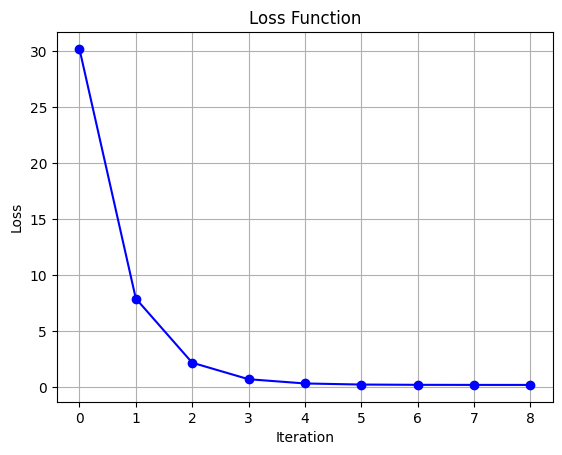

Final position for :  Linear Stochastic  is  [2.14479631 2.09368378]


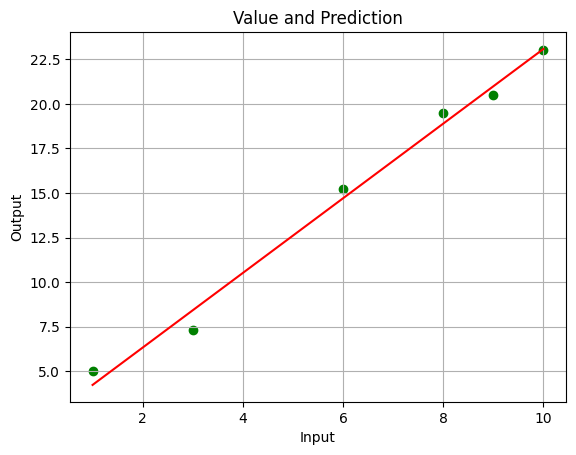

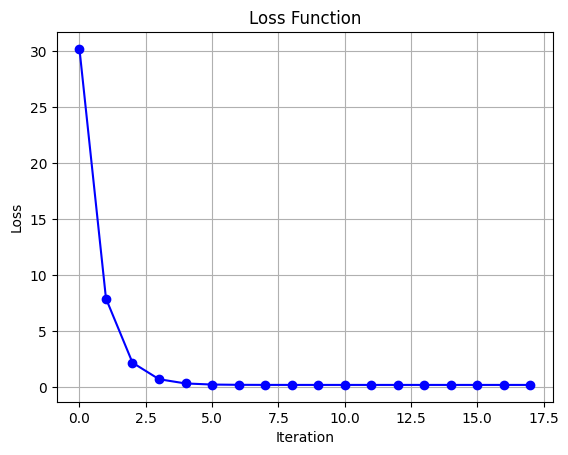

In [21]:
# Parameters
initial_guess = (2, 1)
learning_rate = 0.01
num_iterations = 3
input = np.array([1, 3, 6, 8, 9, 10])
output = np.array([5, 7.3, 15.2, 19.5, 20.5, 23])
predictionmodel = LinearModelPrediction
predictionmodelcost = LinearModelErrorCost


# Running the code for Batch
final_position,losses = Batch_Method(initial_guess, learning_rate, num_iterations, predictionmodel, predictionmodelcost, input, output)
plot(input, output, predictionmodel, final_position, "Linear Batch")

# Running the code for Mini Batch
final_position,losses = Mini_Batch_Method(3, initial_guess, learning_rate, num_iterations, predictionmodel, predictionmodelcost, input, output)
plot(input, output, predictionmodel, final_position, "Linear Mini Batch")

# Running the code for Mini Batch
final_position,losses = Mini_Batch_Method(6, initial_guess, learning_rate, num_iterations, predictionmodel, predictionmodelcost, input, output)
plot(input, output, predictionmodel, final_position, "Linear Stochastic")

#Varying the learning rate
for(learning_rate from 0.01 to 0.1)
  final_position,losses = Batch_Method(initial_guess, learning_rate, num_iterations, predictionmodel, predictionmodelcost, input, output)
  plot(input, output, predictionmodel, final_position, "Linear Batch")

